In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./MSFT.csv")

In [4]:
data.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",139.94,139.14,140.40,138.69,37.28M
1,"Oct 23, 2019",137.24,136.88,137.45,135.61,31.38M
2,"Oct 22, 2019",136.37,138.97,140.01,136.26,27.94M
3,"Oct 21, 2019",138.43,138.45,138.50,137.01,20.72M
4,"Oct 18, 2019",137.41,139.76,140.00,136.56,32.28M


In [5]:
data["daily_return"] = data['Close Price'].pct_change()
data["daily_return"] = data["daily_return"].replace([-np.inf, np.inf], np.nan)
data["daily_return"] = data["daily_return"].dropna()
mean_daily_return = np.mean(data["daily_return"])
daily_std_return = np.std(data["daily_return"])
print("Mean Daily Return : {}".format(mean_daily_return))
print("Daily Standard Deviation of Returns : {}".format(daily_std_return))

Mean Daily Return : -0.0010235198548110246
Daily Standard Deviation of Returns : 0.015754443630775057


In [6]:
print("Annual Mean Returns : {}".format(mean_daily_return * 252))
print("Annual Stdev Returns(Volatility) : {}".format(daily_std_return * np.sqrt(252)))

Annual Mean Returns : -0.2579270034123782
Annual Stdev Returns(Volatility) : 0.2500940393472978


In [7]:
hdfc = pd.read_csv("./Large_Cap/HDFC.csv")
itc = pd.read_csv("./Large_Cap/ITC.csv")
tcs = pd.read_csv("./Large_Cap/TCS.csv")
reliance = pd.read_csv("./Large_Cap/RELIANCE.csv")
gail = pd.read_csv("./Large_Cap/GAIL.csv")

In [8]:
portfolio = pd.DataFrame({"HDFC":hdfc["Close Price"], 
                          "ITC":itc["Close Price"],
                          "TCS":tcs["Close Price"],
                          "RELIANCE":reliance["Close Price"],
                          "GAIL":gail["Close Price"],
                           })

In [9]:
portfolio.head()

,HDFC,ITC,TCS,RELIANCE,GAIL
0,1559.50,277.95,2365.10,1344.10,414.00
1,205.00,283.45,2429.15,1356.30,411.40
2,1566.55,281.65,2455.35,1353.10,408.30
3,1552.50,277.90,2536.20,1327.35,404.75
4,207.00,286.20,2507.15,1318.85,401.05


In [10]:
daily_returns = portfolio.pct_change().dropna()

In [11]:
daily_returns.head()

,HDFC,ITC,TCS,RELIANCE,GAIL
1,-0.868548,0.019788,0.027081,0.009077,-0.006280
2,6.641707,-0.006350,0.010786,-0.002359,-0.007535
3,-0.008969,-0.013314,0.032928,-0.019030,-0.008695
4,-0.866667,0.029867,-0.011454,-0.006404,-0.009141
5,6.425362,0.060797,0.009652,0.004019,-0.027054


In [12]:
mean_daily_returns = daily_returns.mean()
mean_daily_returns

HDFC        1.387116
ITC         0.000109
TCS         0.000177
RELIANCE    0.000206
GAIL       -0.000124
dtype: float64

In [13]:
weights = 0.20
portfolio_return = round(np.sum(weights * mean_daily_returns.values)*252, 2)
print("portfolio Return : {}".format(portfolio_return))

portfolio Return : 69.93


In [14]:
cov_mat = daily_returns.cov()
cov_mat

,HDFC,ITC,TCS,RELIANCE,GAIL
HDFC,5.949124,6.746729e-04,-3.788963e-04,0.000811,0.001988
ITC,0.000675,1.193709e-04,-2.978112e-07,0.000018,0.000013
TCS,-0.000379,-2.978112e-07,4.398226e-04,0.000004,-0.000032
RELIANCE,0.000811,1.824221e-05,3.889162e-06,0.000455,0.000037
GAIL,0.001988,1.319907e-05,-3.230333e-05,0.000037,0.000270


In [22]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])
weights.reshape(5, 1)
portfolio_var = round(np.sqrt(np.dot(weights.T,np.dot(cov_mat, weights))) * np.sqrt(252),2)

In [23]:
print("portfolio volatility: {}".format(portfolio_var))

portfolio volatility: 7.75


In [40]:
num_portfolio = 1200
results = np.zeros((num_portfolio, 3))

In [41]:
for i in range(num_portfolio):
    weights = np.random.random(5)
    weights = weights / np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_var = np.sqrt(np.dot(weights.T,np.dot(cov_mat, weights))) * np.sqrt(252)
    portfolio_sharpe = portfolio_return / portfolio_var
    results[i][0] = portfolio_return
    results[i][1] = portfolio_var
    results[i][2] = portfolio_sharpe

In [42]:
results_df = pd.DataFrame(results,columns=["return","volatility","sharpe"])

In [45]:
results_df.head()

,return,volatility,sharpe
0,70.020345,7.759874,9.023387
1,107.574437,11.913903,9.029319
2,74.487561,8.252614,9.025935
3,114.254887,12.656532,9.027345
4,61.950872,6.865674,9.023276


In [47]:
max_sharpe = results_df.iloc[results_df['sharpe'].idxmax()]
min_vol = results_df.iloc[results_df['volatility'].idxmin()]

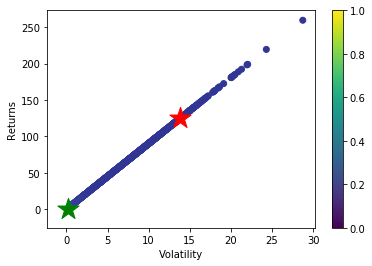

In [55]:
plt.scatter(results_df["volatility"],results_df["return"],c=results_df["sharpe"],cmap='RdYlBu')
plt.scatter(max_sharpe[1],max_sharpe[0],marker="*",color='r',s=500)
plt.scatter(min_vol[1],min_vol[0],marker="*",color='g',s=500)
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.colorbar()